# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 4: Analizando un cubo de datos**

En clases ya vimos varios tipos de datos que utilizamos para analizar objetos astronómicos, como lo hacen las técnicas de fotometria y espectroscopia. En principio, se puede entender la fotometría como un "subconjunto" de la espectroscopia, pero esta última es mucho más costosa.

Con un único espectro solo podemos analizar cómo se descompone la luz de un único objeto, lo cual puede ser muy útil si estudiamos objetos puntuales. En algunos casos queremos estudiar objetos "extendidos" en el cielo, como las galaxias o explorar los espectros de muchas estrellas de forma simultánea (como en un cúmulo de estrellas). Para este tipo de casos, es ideal obtener un espectro para cada posición del cielo alrededor de algún objeto central. Esto se suele conocer como "Espectroscopia de campo integral" (IFS por sus siglas en inglés).

En esta minitarea exploraremos un cubo de datos, aprenderemos a como entender su formato, extraer información fundamental e identificar algunos objetos extrayendo su espectro.

## A jugar con los datos!

Descargue los datos que vamos a utilizar en el siguiente [link.](https://drive.google.com/file/d/1V7j-WJpTY9fZwajyhpp_Vj9ZZ1rjKN_j/view?usp=sharing)

**CUIDADO:** los datos pesan ~3 Gb, usted debe descargarlos y subirlos a alguna carpeta de Drive (misma carpeta donde tendrá esta tarea!).

In [ ]:
# Conectar el drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Ruta del archivo
path_archivo = '/content/drive/MyDrive/ASTRONOMIA/TAREA 4/CSWA31_MUSE_vacuum_zap.fits'

Cargue el cubo de datos con astropy en la siguiente celda.

In [ ]:
# Se carga el cubo de datos
import astropy.io.fits as F
cubo =F.open(path_archivo)


Muestre el *header* de la primera extensión de la variable cubo.

In [ ]:
# Header del cubo
header=cubo[0].header

print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      INSTRUME= 'MUSE    '           / Instrument used.                               RA      =           140.357084 / [deg] 09:21:25.7 RA (J2000) pointing           DEC     =              18.1713 / [deg] 18:10:16.6 DEC (J2000) pointing          EQUINOX =               2000.0 / Standard FK5                                   EXPTIME =              13575.0 / Integration time                               MJD-OBS =       58841.29679796 / Obs start                                      DATE-OBS= '2019-12-24T07:07:23.343' / Ob

Examinando la información desplegada responda:

1.   ¿Qué telescopio tomó los datos?
2.   ¿Qué instrumento lo hizo?
3.   ¿Cuál es el nombre del objeto observado?
4.   Reporte el valor de la variable 'EXPTIME' del header. Esto corresponde al *tiempo de integración* que se necesito para obtener los datos. ¿A qué corresponde ese tiempo?

**Respuesta:**

1.   El telescopio corresponde a **ESO-VLT-U4**, el resultado se puede observar a traves de la llave **TELESCOP**.
2.   El instrumento corresponde a **MUSE**, el resultado se puede observar a traves de la llave **INSTRUME**.
3.   El objeto corresponde a **CSWA 31**, el resultado se puede observar a traves de la llave **OBJECT**.
4.   El objeto corresponde a 13575.0 [s], el resultado se puede observar a traves de la llave **EXPTIME**. El tiempo corresponde a el tiempo que efectivamente durante el cual hubo una recopilaron datos. Ese tiempo corresponde a 13575/60/60=3.77 [hrs].

Ahora que ya conoce el telescopio y el instrumento que tomó los datos, investigue y responda las siguientes preguntas:

1. ¿De que tamaño es el diámetro del espejo del telescopio?
2. ¿Cuán grande es el campo de visión que examina el instrumento (Field of view o FOV en inglés)? Compare dicho campo de visión con el tamaño angular de la luna visto desde la tierra (algo así como medio grado) ¿Cuántos campos de visión del intrumento "caben" en la luna?.
3. ¿Qué rango de longitud de onda explora este instrumento?

**Respuesta:**

1. El sistema se compone de 4 telescopios opticos con diametro de 8.2 [m].
2. El instrumento posee un campo de vision de 1 x 1 minuto de arco. El factor de conversion para obtener los datos en minutos de arco es:\
1°=60 minarc\, por lo que 0.5° corresponde a 30 minutos de arco.
Debemos dividir el campo de vision de la luna en el obtenido por el instrumento.
\begin{equation}
Numero\ campos\ de\ vision = \frac{Campo\ de\ vision \ luna [arcmin]}{Campo \ de\ vision\ MUSE[arcmin]} = \frac{30}{1} = 30
\end{equation}
Con lo anterior se obtiene que 30 campos de vision "caben" en la Luna.

3. El rango de longitud de onda corresponde a 480-930 nm.

Explore la extensión asociada a los datos (índice = 1).
Extraiga los datos y describa cada eje del cubo. ¿En que unidades se encuentran los datos?
**Respuesta:**
1. CTYPE1: describe el eje "x", su valor corresponde a RA---TAN' lo que indica ascencion recta en una proyeccion gnomonica.

2. CTYPE2: describe el eje "y", su valor corresponde a DEC---TAN' lo que indica la declinacion en una proyeccion gnomonica.

3. CTYPE3: describe el eje "z", su valor corresponde a WAVE' lo que indica wuer corresponde a la longitud de onda.

4. La variable BUNIT corresponde a '10**-20 Angstrom-1 cm-2 erg s-1' lo que podria indicar la densidad del flujo de la energia. El flujo de energia corrpesponde a [Energia]/s-1.


**Hint:** explore las variables 'CTYPE', estas le indicarán a que corresponde cada eje del cubo. Las unidades se encontrarán en la variable 'BUNIT'.

In [ ]:
# Header de la primera extensión (índice = 1)
header1=cubo[1]

print(header1.header)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  322                                                  NAXIS2  =                  325                                                  NAXIS3  =                 3682                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               WCSAXES =                    3 / Number of coordinate axes                      CRPIX1  =      160.93047228529 / Pixel coordinate of reference point            CRPIX2  =       162.3187381719 / Pixel coordinate of reference point            CUNIT1  = 'deg'                / Units of coordinate increment and value        CUNIT2  = 'deg'                / Units o

In [ ]:
# Almacenamiento de datos
datos =header1.data

In [ ]:
print(datos.shape)

(3682, 325, 322)


## White-light image y su visualización

Una white-light image es una imagén en la cual se sumó en la dirección espectral, es decir, sumamos todos los fotones que llegaron en todo el rango explorado, de ahí el origen del nombre.

Cree un código capaz de calcular una white-light image (una línea con numpy), quizá se demore un poco en ejecutar esta parte.

In [ ]:
# Se reemplazan los datos Nan por cero.
import numpy as np
image=cubo['DATA'].data
image = np.nan_to_num(image)
white_light_image = np.sum(image, axis=0)


Visualice su imagen con plt.imshow().

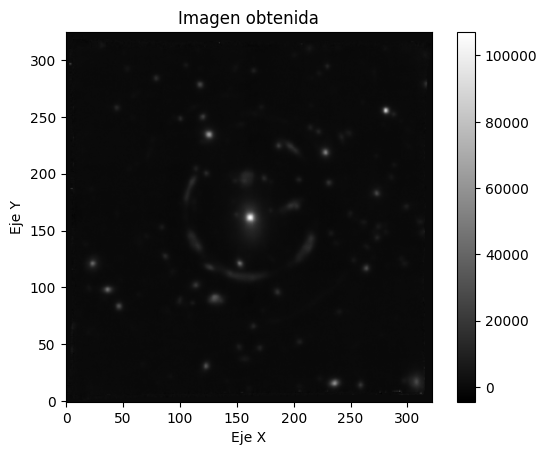

In [ ]:
#Impresion del grafico
import matplotlib.pyplot as plt
plt.imshow(white_light_image, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Imagen obtenida')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


Notará que en la imagen existen una especie de arcos aproximadamente circulares. Explique brevemente, ¿a qué fenómeno físico corresponde esto?

**Respuesta:** Puede corresponder a la difraccion de la luz en el instrumento.

El resultado crudo de dicha visualización puede mejorar de forma significativa.
Para ello usted debe:
1. Cortar la imagen para enforcarnos en las figuras "semi circulares" que se aprecian.
2. Ajustar la scala de la imagen para generar mayor contraste.
3. Cambie el mapa de colores a uno que le parezca adecuado ([aquí una lista](https://matplotlib.org/stable/users/explain/colors/colormaps.html)).
4. Añadir coordenadas a los ejes y una colorbar.


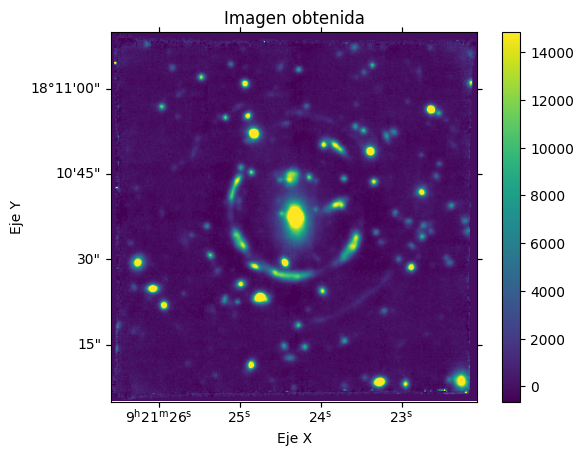

In [ ]:
# Mejorando la visulacion ddl grafico
from astropy.wcs import WCS

import numpy as np
image=cubo['DATA'].data
image = np.nan_to_num(image)
white_light_image = np.sum(image, axis=0)
xst, xen = 100, 300
yst, yen = 100, 300
imagec=white_light_image[yst:yen,xst:xen]


# wcs añade las coordenadas a su visualización.
wcs = WCS(cubo[1].header)
wcs = wcs[0,yst:yen,xst:xen]
vmin,vmax=np.percentile(imagec,[1,99])
# Haga su gráfico a continuación:

import matplotlib.pyplot as plt
ax = plt.subplot(projection=wcs)
imaq=ax.imshow(white_light_image, cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(imaq, ax=ax, orientation='vertical')
plt.title('Imagen obtenida')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

Para lo que viene utilizaremos una librería creada para lidiar con cubos de datos.
La instalaremos utilizando **pip**, note que esta instalación es solo en el ambiente de google colab, nada se instalará en su computador.  
La documentación la puede encontrar [aquí.](https://mpdaf.readthedocs.io/en/stable/)

In [ ]:
!pip install mpdaf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 968.0/968.0 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import mpdaf as mpdaf

# Lista de las 4 coordenadas extraídas de la Tabla 1 del artículo https://arxiv.org/pdf/2203.13759
# s0(a) =  9:21:25.040, 18:10:12.27    (RA, DEC)
# s0(b) =  9:21:25.858, 18:10:07.24    (RA, DEC)
# s0(c) =  9:21:26.439, 18:10:13.60    (RA, DEC)
# s0(d) =  9:21:25.781, 18:10:24.64    (RA, DEC)

# Creacion del objeto con SkyCoord para cada una de las coordenadas anteriormente indicadas.
s0a =SkyCoord(ra="9:21:25.040",dec="18:10:12.27",unit=(u.hourangle,u.deg))
s0b =SkyCoord(ra="9:21:25.858",dec="18:10:07.24",unit=(u.hourangle,u.deg))
s0c =SkyCoord(ra="9:21:26.439",dec="18:10:13.60",unit=(u.hourangle,u.deg))
s0d =SkyCoord(ra="9:21:25.781",dec="18:10:24.64",unit=(u.hourangle,u.deg))

# Impresión de las coordenadas en grados de la primera coordenada.
print('s0a = (RA, DEC) = ',s0a.ra.value,',' ,s0a.dec.value)

s0a = (RA, DEC) =  140.3543333333333 , 18.170075


Cargaremos el cubo con mpdaf y luego extraeremos espectros con aperturas circulares.

In [ ]:
# Cargando el cubo con mpdaf
cube = mpdaf.obj.Cube(path_archivo)

Busque la documentación de mpdaf.obj.Cube, allí encontrará el método "aperture".
Este método extrae un espectro de una apertura circular en el cubo.

Averigue como utilizar dicha función para extraer un espectro en cada coordenada antes creada
considerando, una apertura de diámetro de 2"
Un pequeño hint: el centro debe ser de la forma (dec, ra) y cada coordenada con su valor en grados.

In [ ]:
# Se Rellena el código a continuación reemplazando el "CENTRO" y "radio", según corresponda.

CENTRO1 = (s0a.dec.value, s0a.ra.value)
CENTRO2 = (s0b.dec.value, s0b.ra.value)
CENTRO3 = (s0c.dec.value, s0c.ra.value)
CENTRO4 = (s0d.dec.value, s0d.ra.value)

RADIO = 5
print(RADIO)
espectro_s0a = cube.aperture(CENTRO1, RADIO, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0b = cube.aperture(CENTRO2, RADIO, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0c = cube.aperture(CENTRO3, RADIO, unit_center=u.deg, unit_radius=u.arcsec)
espectro_s0d = cube.aperture(CENTRO4, RADIO, unit_center=u.deg, unit_radius=u.arcsec)

5


[INFO] 2500 spaxels used
INFO:mpdaf.obj.data:2500 spaxels used
[INFO] 2500 spaxels used
INFO:mpdaf.obj.data:2500 spaxels used
[INFO] 2500 spaxels used
INFO:mpdaf.obj.data:2500 spaxels used
[INFO] 2500 spaxels used
INFO:mpdaf.obj.data:2500 spaxels used


Grafique los 4 espectros en un único gráfico. Notará que es bastante difícil descifrar algo de forma directa con plots "crudos". Estos espectros se ven todos bastante parecidos.

Grafique únicamente el rango de longitud de onda entre 9240-9310 Å.
Para esto puede utilizar el método "plot" de los objetos antes creados.

(9240.0, 9310.0)

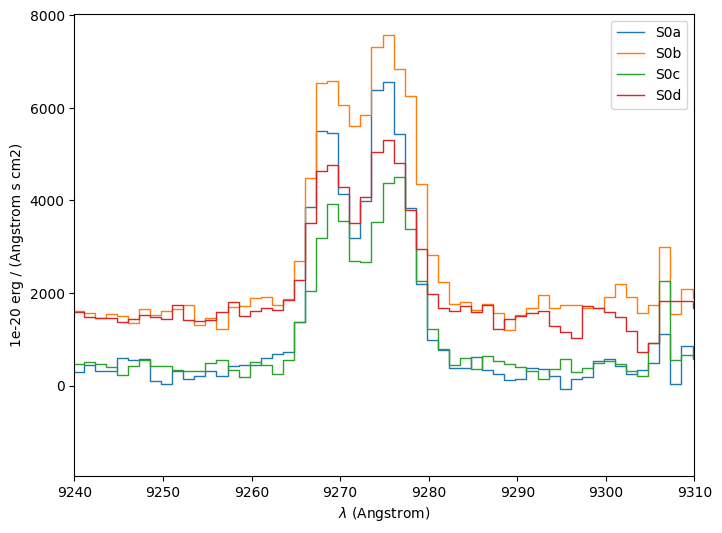

In [ ]:
# Impresion de los 4 espectros
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
espectro_s0a.plot(label='S0a')
espectro_s0b.plot(label='S0b')
espectro_s0c.plot(label='S0c')
espectro_s0d.plot(label='S0d')
plt.legend()
plt.xlim(9240, 9310)


Notará que hay una emisión bastante clara con 2 máximos, uno detrás de otro.
Esto es lo que se conoce como líneas espectrales de emisión de una galaxia.
En particular, estas líneas parecen ser todas iguales entre los distintos espectros. Los autores del artículo antes mencionado afirman que estas 4 coordenadas provienen de una misma única fuente de fondo, ¿cómo justificarían dicha afirmación con el gráfico que obtuvieron recién?

**Respuesta:** Se puede justificar en base a que sus formas son similares y la amplitud de cada pico es decreciente en (S0b>S0a>S0d>S0c).

Esta emisión proviene del gas de estas fuentes, en particular es una línea de  OII, es decir, oxígeno que fue ionizado. Esta línea es lo que se conoce como un "doblete" (doublet en inglés), lo que quiere decir que en realidad son dos líneas, muy cercanas en longitud de onda. La longitud de onda medida en laboratorio de ambas líneas es 3727.092 Å y 3729.875 Å, respectivamente. Claramente las líneas que vemos en estas fuentes no están centradas en esas longitudes de onda.

El desplazamiento aparente de las longitudes de onda, con respecto a aquellas medidas en el laboratorio, es un efecto de la expansión del universo. La expansión genera que los fotones pasen a tener una longitud de onda cada vez más larga a medida que se alejan de un observador. Esto se suele definir con la cantidad "redshift" (z) definida por:

$$\lambda_{obs} = (1+z) \lambda_0 $$

donde $\lambda_{obs}$ y $\lambda_0$ corresponde a la longitud de onda observada y aquella medida en el laboratorio. Vamos a determinar el redshift de esta fuente, para ello fitearemos un modelo que considera dos gaussianas (una para cada línea) y una constante, es decir nuestro modelo es de la forma:

$$f(\lambda, z,  A_1, \sigma_1, A_2, \sigma_2, C) = A_1 \exp(-(\lambda - (1+z)\lambda_{0,1})^2 /(2 \sigma_1^2 ))  + A_2 \exp(-(\lambda - (1+z)\lambda_{0,2})^2 /(2 \sigma_2^2 )) + C$$

Donde $\lambda_{0,1} = 3727.092$ Å y $\lambda_{0,2} = 3729.875$ Å.

MPDAF ya es capaz de hacer este fit por nosotros, para ello proceda como se le indica:

1. Note que cada espectro antes producido es un objeto de Python, dichos objetos tienen como método gauss_dfit. Explore la documentación de mpdaf y busque el método gauss_dfit. Describa los 3 primeros parámetros de dicha función.
**Respuesta:**
- lmin:
Valor mínimo de longitud de onda o rango de longitud de onda utilizado para inicializar el valor izquierdo gaussiano.

- lmax: Longitud de onda máxima o rango de longitudes de onda utilizado para inicializar el valor derecho gaussiano.

- wratio: Relación entre los dos centros de la gaussiana.
2. Considerando que vamos a hacer nuestro fit en el rango 9240-9310 Å, utilice el método antes descrito.

3. El resultado deberían ser dos objetos de tipo obj.Gauss1D, utilice el método print_param() para mostrar los resultados de cada fit.

In [ ]:
# Utilizando el método gauss_dfitpara un solo espectro (espectro_s0a)
amin=3727.092
amax=3729.875
lmin=9240
lmax=9310
wratio=(amin)/amax
fit1, fit2 = espectro_s0a.gauss_dfit(lmin=lmin,lmax=lmax,wratio=wratio)  # rellene con los parámetros adecuados

# Impresión de los parámetros del primer objeto Gauss1D (fit1) con el método "print_param"
fit1.print_param()


[INFO] Gaussian center = 9275.47 (error:0.0554802)
INFO:mpdaf.obj.fitting:Gaussian center = 9275.47 (error:0.0554802)
[INFO] Gaussian integrated flux = 33223.8 (error:697.519)
INFO:mpdaf.obj.fitting:Gaussian integrated flux = 33223.8 (error:697.519)
[INFO] Gaussian peak value = 6344.97 (error:10.543)
INFO:mpdaf.obj.fitting:Gaussian peak value = 6344.97 (error:10.543)
[INFO] Gaussian fwhm = 4.91912 (error:0.0951011)
INFO:mpdaf.obj.fitting:Gaussian fwhm = 4.91912 (error:0.0951011)
[INFO] Gaussian continuum = 443.973
INFO:mpdaf.obj.fitting:Gaussian continuum = 443.973


In [ ]:
# Impresion de los parámetros del segundo objeto Gauss1D (fit2) con el metodo "print_param"
fit2.print_param()

[INFO] Gaussian center = 9268.55 (error:0.0554388)
INFO:mpdaf.obj.fitting:Gaussian center = 9268.55 (error:0.0554388)
[INFO] Gaussian integrated flux = 26622.1 (error:687.703)
INFO:mpdaf.obj.fitting:Gaussian integrated flux = 26622.1 (error:687.703)
[INFO] Gaussian peak value = 5084.21 (error:33.0426)
INFO:mpdaf.obj.fitting:Gaussian peak value = 5084.21 (error:33.0426)
[INFO] Gaussian fwhm = 4.91912 (error:0.0951011)
INFO:mpdaf.obj.fitting:Gaussian fwhm = 4.91912 (error:0.0951011)
[INFO] Gaussian continuum = 443.973
INFO:mpdaf.obj.fitting:Gaussian continuum = 443.973


Note que los modelos no reportan las variables $\sigma$ antes descritas, sino que para describir el ancho utilizan la variable fwhm lo cual es una abreviación para la palabra Full width at half Maximum (ancho a media altura en español).

Responda:
- ¿Qué es el FWHM?
- Para una distribución normal, escriba una ecuación que relacione el FWHM con la desviación estándar $\sigma$ (no es necesario que la demuestre).  

**Respuesta:**
- El FWHM (Full Width at Half Maximum) es la anchura a media altura que presenta un determinado pico de emisión.

- Cuando hay una distribucion normal tenemos:
\begin{equation}
\text{FWHM} = 2 \sqrt{2 \ln 2} \cdot \sigma\approx 2.35482*\sigma
\end{equation}


Ahora, veremos que tan bien lo hizo este modelo, para ello graficaremos encima del espectro el modelo que se obtuvo.

In [ ]:
# Función gaussian que simplifica la expresion

def gaussian(x, center, fwhm, peak):
  sigma = fwhm/2.355
  dif = x - center
  return peak * np.exp(-(dif**2)/(2*sigma**2))

Realice un gráfico que contenga el espectro en el cual se realizó el "fit" y el modelo encontrado.
Para ello debe implementar la función $f(\lambda, z,  A_1, \sigma_1, A_2, \sigma_2, C)$. Esto se puede realizar utilizando la función "gaussian" del bloque anterior o puede hacer su propia implementación desde 0.

Solo grafique el rango entre 9240-9310 angstroms. Recuerde incluír alguna leyenda, nombres en los ejes, título, etc.

In [ ]:
# Inserte aquí su gráfico:

def gauuss(wave, A1, fwhm1, A2, fwhm2, C, lambda0_1, lambda0_2):
    return (gaussian(wave, lambda0_1, fwhm1, A1) + gaussian(wave, lambda0_2, fwhm2, A2) + C)

# Parámetros del ajuste fit1
A1 = 5145.42  # Amplitud de la primera gaussiana
fwhm1 = 11.5673  # FWHM de la primera gaussiana
lambda0_1 = 9272.89  # Centro de la primera gaussiana

# Parámetros del ajuste fit2
A2 = 3180.49  # Amplitud de la segunda gaussiana
fwhm2 = 11.5673  # FWHM de la segunda gaussiana
lambda0_2 = 6.91885  # Centro de la segunda gaussiana

# Constante
C = 443.973

flux = espectro_s0a.data

combined_model_flux = gauuss(wave_array, A1, fwhm1, A2, fwhm2, C, lambda0_1, lambda0_2)

plt.plot(wave_array, combined_model_flux, label='Modelo Combinado', color='purple')
plt.xlabel('Longitud de Onda (Å)')
plt.ylabel('Flujo')
plt.title('Espectro Observado y Modelos Ajustados')
plt.legend()
plt.grid(True)
plt.xlim(9240, 9310)  # Limitar el rango del eje x
plt.show()

NameError: name 'model_function' is not defined

Finalmente, con el resultado del fit, podemos encontrar el redshift de la fuente. Para ello simplemente calcule el redshift (z) utilizando la definición provista, considerando que la longitud de onda observada corresponde con algún centro de las gaussianas.


In [ ]:
# Escriba aquí código para el cálculo:

lambda_0 =  3727.092  # consideramos la línea de longitud de onda más corta
z =
print('El redshift es: {:.3f}'.format(z))

A modo de curiosidad, el redshift de esta galaxia indica que la luz que observamos se emitió hace poco menos de 10.000 millones de años, 2/3 de la edad del universo :o !!

## Opcional: no todo es Python!

Existe software capaz de proveer de una visualización y análisis rápido de datos como los que utilizamos en esta actividad. Uno de ellos especialmente diseñado para lidiar con cubos de datos es QfitsView.
El software se puede descargar en el siguiente [link](https://www.mpe.mpg.de/~ott/QFitsView/).

Descargue el software y abra directamente los datos descargados en su computador, para ello debe seleccionar la extensión "DATA". Notará que abrirá el cubo y podrá desplazarse a lo largo de todos los canales. Ajuste la escala a "linear" y utilizando el 98% del rango de los datos para un mejor contraste.

Una pequeña guía para repetir todo lo que hicieron en la actividad:
- A medida que mueve su "ratón" por sobre la imagen del canal seleccionado, verá que el "gráfico" de abajo cambia. Dicho gráfico por defecto es el espectro asociado al pixel en el cual su "ratón" está.
- Podemos fijar el espectro que queremos visualizar, para ello haga click derecho en alguna fuente que quiera observar con detalle y seleccione "lock position".
- Para mejorar la señal a ruido de los espectros es recomendable sumar la contribución de varios pixeles al mismo tiempo, para ello, en el gráfico del espectro en su parte superior, seleccione "Circular" en vez de "Single pixel" y aumente el radio (donde dice "R1") a unos 5 pixeles.  
- Si desea analizar en detalle dicho espectro, lo pueden guardar como un archivo fits, para ello solo deben apretar "click derecho" encima de la fuente de interés (sugiero una galaxia muy brillante en el sur-este cerca del arco gravitacional). También pueden guardarlo en otro "buffer" y solo cambiarse de buffer para ver cada espectro.

Pueden aquí ver una serie de [videos tutorial](https://www.youtube.com/playlist?list=PLdVESrjTNUXtwxwysIDLoC4pV20Lbvqaz) si desean aprender más.